# Predict rotation period for Kepler stars using existing model

load trained random forest models and predict rotation periods from provided features or light curve(s).

## Calculate rotation period(s) from features

Below is a tutorial to calculate rotation period(s) for single or multiple stars using the existing model. Currently, this model is only tested on stars in the Kepler field. To achieve the best results, the light curve statistics should be calculated from Kepler light curves. For any stars outside of the Kepler field, it is best to use the model with 1 estimators to minimize model bias.

In [2]:
import Astraea
import pandas as pd
import numpy as np

# print out needed features in order
TrainF_class, TrainF_reg = Astraea.getTrainF()

# load in existing testing data
KeplerTest = Astraea.load_KeplerTest()


>>> classification features are: ['LG_peaks [Lomb-Scargle peak height]', 'Rvar [ppm]', 'parallax [gaia]', 'radius_percentile_lower [gaia]', 'radius_percentile_upper [gaia]', 'phot_g_mean_flux_over_error [gaia]', 'bp_g [gaia]']


>>> regression features are: ['teff [gaia]','bp_g [gaia]','lum_val [gaia]','v_tan [getVs()]','phot_g_mean_flux_over_error [gaia]','v_b [getVs()]','radius_val [gaia]','b [gaia]','Rvar [ppm]','flicker [FLICKER]']




If the data contains all features, first create a dictionary with required columns, then convert it into a <*pd.DataFrame*>,

In [3]:
# construct pd.DataFrame that contains all the features
starStat = {'LG_peaks': KeplerTest.LG_peaks.values, 'Rvar': KeplerTest.Rvar.values,
          'parallax': KeplerTest.parallax.values,
          'radius_percentile_lower': KeplerTest.radius_percentile_lower.values,
          'radius_val': KeplerTest.radius_val.values,
          'radius_percentile_upper': KeplerTest.radius_percentile_upper.values,
          'phot_g_mean_flux_over_error': KeplerTest.phot_g_mean_flux_over_error.values,
          'bp_g': KeplerTest.bp_g.values, 'teff': KeplerTest.teff.values,
          'lum_val': KeplerTest.lum_val.values, 'v_tan':KeplerTest.v_tan.values,
          'v_b': KeplerTest.v_b.values, 'b': KeplerTest.b.values,
          'flicker':KeplerTest.flicker.values, 'Prot': KeplerTest.Prot.values,
          'Prot_err': KeplerTest.Prot_err.values}

# dictionary -> dataframe
star_data = pd.DataFrame(starStat)

# only display 6 columns
pd.set_option("display.max_columns", 6)

star_data

,LG_peaks,Rvar,parallax,...,flicker,Prot,Prot_err
0,0.589608,5053.753125,12.472423,...,0.001139,22.736980,2.369760
1,0.162442,2232.375000,5.677683,...,0.000471,5.480000,0.500000
2,0.654339,1021.548438,9.395085,...,0.001802,28.779253,4.690020
3,0.434910,12080.606250,6.609612,...,0.001328,2.002000,0.014000
4,0.301622,6154.762500,6.351729,...,0.000479,4.733000,0.059000
...,...,...,...,...,...,...,...
200,5.709757,19928.750000,13.199997,...,0.001050,9.939000,0.015000
201,0.610268,203.850000,5.504599,...,0.001476,19.567000,1.062000
202,0.777997,169.729492,8.506015,...,0.006036,30.843687,2.999815
203,0.644850,384.446289,9.621642,...,0.008710,34.280000,0.083000


Plot correlations between features and rotation period,

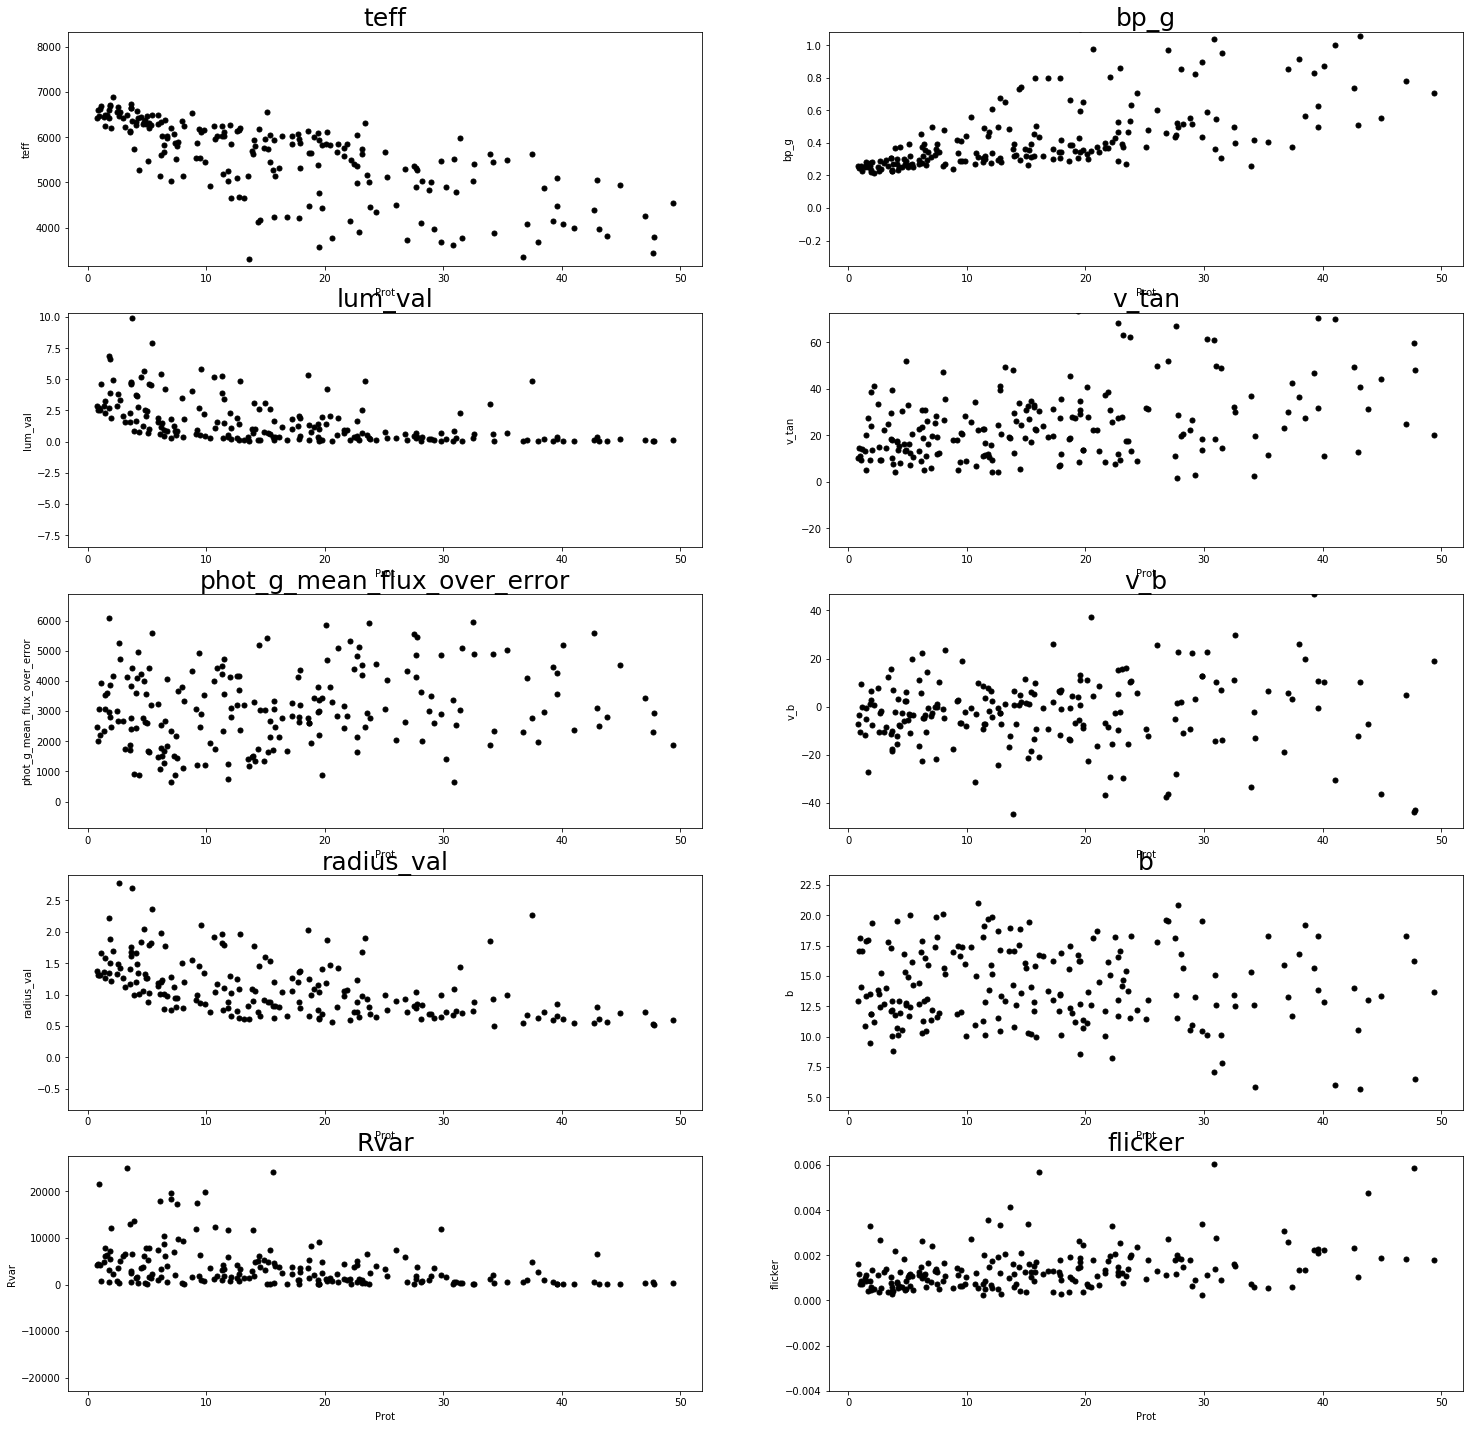

In [4]:
Astraea.plot_corr(star_data,TrainF_reg,MS=10)

You can now feed the <*pd.DataFrame*> into the function to predict rotation periods,

In [6]:
predics = Astraea.getKeplerProt(star_data)

>>> classification features are: ['LG_peaks [Lomb-Scargle peak height]', 'Rvar [ppm]', 'parallax [gaia]', 'radius_percentile_lower [gaia]', 'radius_percentile_upper [gaia]', 'phot_g_mean_flux_over_error [gaia]', 'bp_g [gaia]']


>>> regression features are: ['teff [gaia]','bp_g [gaia]','lum_val [gaia]','v_tan [getVs()]','phot_g_mean_flux_over_error [gaia]','v_b [getVs()]','radius_val [gaia]','b [gaia]','Rvar [ppm]','flicker [FLICKER]']


Total 205 stars!
Classifing 205 stars!
205.0 stars have predictable rotation periods (100.0%)
Predicting rotation periods!
Finished!


In [7]:
predics

,True Prot,True Prot_err,Prot prediction w/ 1 est,Prot prediction w/ 100 est
0,22.736980,2.369760,18.041,16.096785
1,5.480000,0.500000,4.138,4.644040
2,28.779253,4.690020,22.334,18.535857
3,2.002000,0.014000,9.548,5.751400
4,4.733000,0.059000,4.138,3.841780
...,...,...,...,...
200,9.939000,0.015000,6.426,11.572000
201,19.567000,1.062000,13.459,7.922410
202,30.843687,2.999815,35.814,15.489082
203,34.280000,0.083000,34.239,19.050126


## Download a light curve and calculate variablity, lomb-scargle peak and flickers needed for the trained model

Here is a basical tutorial for calculating light curve statistics needed for the trained model. Other statistics can found by cross-matching any Kepler stars with Gaia (a useful website crossmatching Kepler and Gaia by Megan Bedell https://gaia-kepler.fun). v_tan and v_b can be calculated after crossmatching Kepler with Gaia and use the function *Astraea.getVs()*.

*lightkurve* is used to download the light curve (https://docs.lightkurve.org).

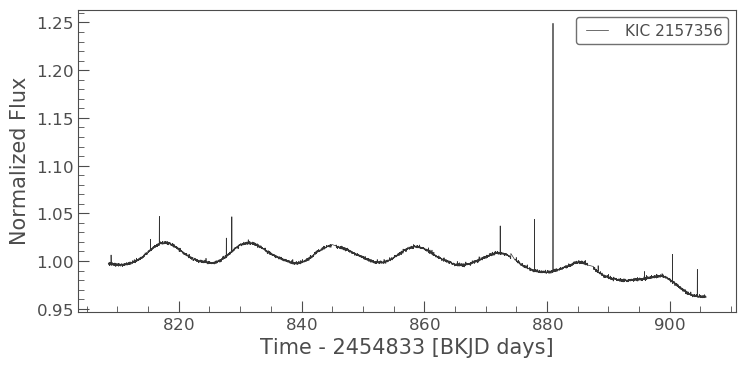

In [11]:
import Astraea
import pandas as pd
import numpy as np
from lightkurve import search_targetpixelfile

# download light curve and plot it
tpf = search_targetpixelfile('KIC 2157356', quarter=9).download()
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)
lc.plot()

Normalize the light curve and get time, flux and flux error,

In [12]:
t = lc.time # get time in days
sig = lc.flux*1e6/(np.median(lc.flux)-1) # get flux in ppm
sig_err = lc.flux_err/(np.median(lc.flux)-1) # get flux_err in ppm

Get varibility of light curve (**Rvar**)

In [4]:
Rvar = Astraea.getRvar(sig)
Rvar

42303.15312499995

Get Lomb-Scargle peak height (**LG_peaks**),

In [5]:
LG_Prot, LG_peaks = Astraea.getLGpeak(t,sig,sig_err)
LG_Prot, LG_peaks

(13.275704451936583, 0.20658748911841823)

Get flicker value (**flicker**). It will download *FLICKER* if not already installed,

In [7]:
flicker = Astraea.getFlicker(t,sig)
flicker

12609.067447067864

# Train a regressor model and test its performance

Here is a simple example to train a simple regressor model and test the performance by calculating $\chi^2$, the relative median error, plotting the impurity feature importance and plotting the true vs predicted values from the cross-validation test.

## Train a regressor model

Generate a <*pd.DataFrame*> of random features and labels to test Astraea.RFregressor. 

Normally user will create a <*pd.DataFrame*> to include all the features and labels. Below is an example of creating a DataFrame with 20 feature columns with random numbers, named "$X0$", "$X1$", ..., "$X19$" and a label column that is a sum of all the linear combinations of the features, named "$y$" as well as randomly generated label error named "$y\_err$". Note that for this problem, the coefficients for the linear combinations are in decreasing order, so that $y=20*X0+19*X1+...+1*X19$. By doing so, we can validate the feature importance output later on.

In [2]:
import Astraea
import pandas as pd
import numpy as np

# create random feature matrix with 20 features and 5000 total data points
X = np.random.rand(5000, 20)

# create labels from features
y = sum([X[:,i] * (20-i) for i in range(np.shape(X)[1])])

# put features and labels into one pandas dataFrame
X_y = pd.DataFrame(np.hstack((X,np.reshape(y, (5000, 1)))),
                   columns = np.append(['X'+str(i) for i in range(np.shape(X)[1])], ['y']))

# assign random errors
X_y['y_err'] = np.random.rand(5000)

# only display 9 columns
pd.set_option("display.max_columns", 9)

X_y

,X0,X1,X2,X3,...,X18,X19,y,y_err
0,0.606529,0.062959,0.720791,0.981319,...,0.635287,0.644116,98.640853,0.159159
1,0.777415,0.010855,0.785878,0.399668,...,0.335854,0.830296,120.593567,0.662260
2,0.702256,0.269779,0.331504,0.521144,...,0.611254,0.015499,103.314942,0.199658
3,0.068799,0.276065,0.507314,0.956416,...,0.007095,0.035967,87.488786,0.440642
4,0.941370,0.447072,0.666370,0.061702,...,0.768792,0.505517,98.850524,0.571305
...,...,...,...,...,...,...,...,...,...
4995,0.850935,0.866016,0.912287,0.974070,...,0.411835,0.353871,114.993805,0.380209
4996,0.387948,0.155788,0.178811,0.680044,...,0.327828,0.442220,90.433563,0.173283
4997,0.927812,0.779648,0.412766,0.406887,...,0.534086,0.906392,114.112874,0.505117
4998,0.791832,0.091674,0.730668,0.880411,...,0.363859,0.788126,126.543979,0.753451


Train the regressor model with the <*pd.DataFrame*> generated above.

To use the regressor (*Astraea.RFregressor*) with default settings, input the **<*pd.DataFrame*>** combining all the features, label and label error, the **feature column names** in a list, the **label column name** and the **label error column name**. The default label column name is "Prot" and the default label error column name is "Prot_err". Here we also used 3 estimators instead of the default, which is 100 estimators, to minimize the variance. User could tune any hyper-parameters described in https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html. 

In [3]:
# train the model with default settings
regr, regr_outs = Astraea.RFregressor(X_y, ['X'+str(i) for i in range(np.shape(X)[1])], 
                                      target_var='y', target_var_err='y_err', n_estimators=3)

Simpliest example:
 regr,regr_outs = RFregressor(df,testF)

Fraction of data used to train: 0.8
# of Features attempt to train: 20
Features attempt to train: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19']
ID column not found, using index as ID!
5000 stars in dataframe!
5000 total stars used for RF!
4000 training stars!
Finished training! Making predictions!
Finished predicting! Calculating statistics!
Median Relative Error is: 0.06410001201586864
Average chi^2 is: 1016.3934151688192
Finished!


Print out the model statistics. Output discription see https://astraea.readthedocs.io/en/latest/user/api.html.

In [4]:
regr_outs

importance    [0.12945057256415657, 0.1158549055147204, 0.13...
actrualF      [X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, ...
ID_train      [2209, 56, 4923, 3246, 2584, 2332, 3790, 1088,...
ID_test       [0, 5, 11, 14, 24, 26, 27, 29, 32, 34, 44, 46,...
prediction    [101.27825467776267, 106.76937748535295, 120.9...
ave_chi2                                                1016.39
MRE                                                      0.0641
X_test        [[0.6065293441789202, 0.06295926764117177, 0.7...
y_test        [98.64085252981158, 106.29389418685801, 131.77...
X_train       [[0.706831266028258, 0.14969010436464858, 0.06...
y_train       [106.74227914082933, 117.09292189496267, 141.1...
dtype: object

## Plot the feature importances and Predicted vs True plot

User can use the function *Astraea.plot_result* to plot the basic impurity feature importance in decending order. https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e explained what impurity feature importance is and some other way of determining the importance that user can impliment. 


To use this function, user could use the outputs from the *Astraea.RFregressor* function directly or specify the required inputs.

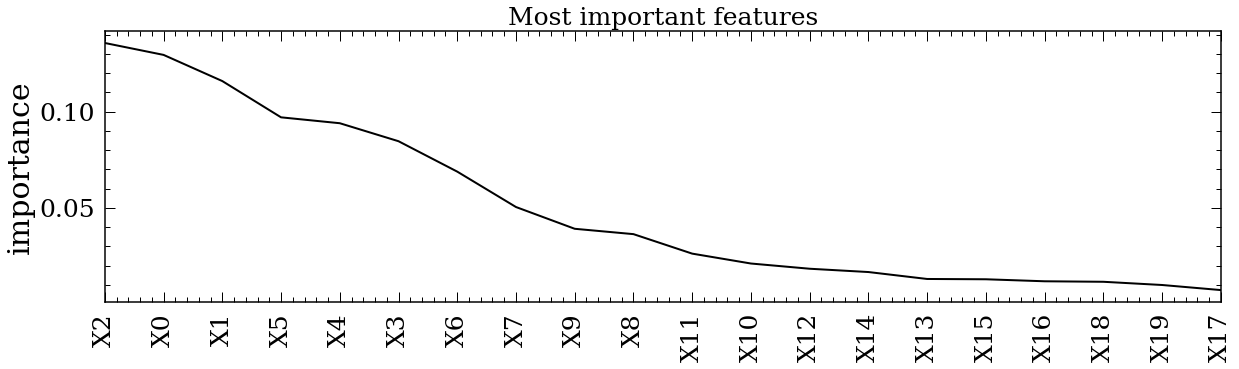

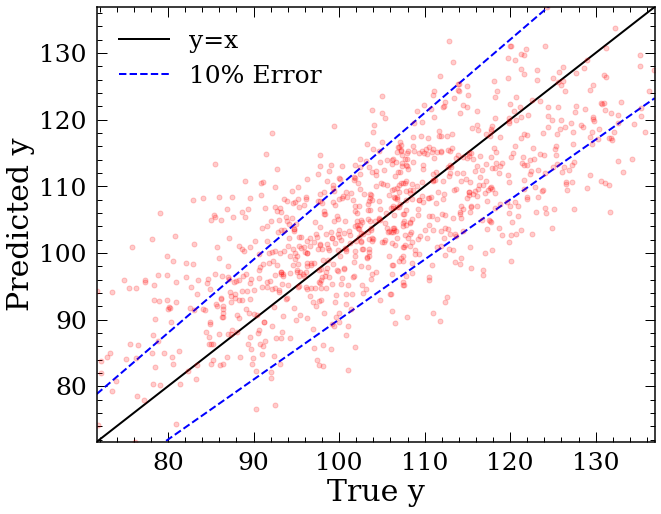

In [5]:
# plot cross-validation result 
Astraea.plot_result(regr_outs['actrualF'], regr_outs['importance'], regr_outs['prediction'],
                    regr_outs['y_test'], labelName='y', MS=10)


## Use the trained model to predict a new label value

User can now use the trained model to predict a new label value based on the trained features. To do so, simply pass the feature values in order.

In [8]:
# generate new random data
X_test_matrix = np.random.rand(5000, 20)

# put into dataframe so we can call the feature names in order
X_test = pd.DataFrame(X_test_matrix, columns = ['X'+str(i) for i in range(np.shape(X)[1])])

# predict using the trained model
y_test = regr.predict(X_test[regr_outs['actrualF']])

y_test

array([ 93.65384246,  92.54149011, 103.50259242, ..., 120.4926051 ,
        86.8585833 , 102.70998368])

# Train a classifier model and plot the Receiver operating characteristic (ROC) curve

Here is a example to train a classifier and plot the ROC curve.

## Train a classification model

The process is very similar to training a regressor. User need to first generate a <*pd.DataFrame*> with all the features and labels and feed it to the model.  

In [3]:
import Astraea
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification

# use sklearn.datasets to generate a dataset to test
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)

# put features and labels into one pandas dataFrame
X_y = pd.DataFrame(np.hstack((X,np.reshape(y,(1000,1)))), 
                   columns=np.append(['X'+str(i) for i in range(np.shape(X)[1])], ['y']))

# print out DataFrame
X_y

,X0,X1,X2,X3,y
0,-1.668532,-1.299013,0.274647,-0.603620,0.0
1,-2.972883,-1.088783,0.708860,0.422819,0.0
2,-0.596141,-1.370070,-3.116857,0.644452,0.0
3,-1.068947,-1.175057,-1.913743,0.663562,0.0
4,-1.305269,-0.965926,-0.154072,1.193612,0.0
...,...,...,...,...,...
995,-0.383660,0.952012,-1.738332,0.707135,1.0
996,-0.120513,1.172387,0.030386,0.765002,1.0
997,0.917112,1.105966,0.867665,-2.256250,1.0
998,0.100277,1.458758,-0.443603,-0.670023,1.0


In [4]:
# train the model with default settings
regr, regr_outs = Astraea.RFclassifier(X_y, ['X'+str(i) for i in range(np.shape(X)[1])],
                                       target_var='y', n_jobs=1)

Simpliest example:
 regr,regr_outs = RFregressor(df,testF)

Fraction of data used to train: 0.8
# of Features attempt to train: 4
Features attempt to train: ['X0', 'X1', 'X2', 'X3']
ID column not found, using index as ID!
1000 stars in dataframe!
1000 total stars used for RF!
800 training stars!
Finished training! Making predictions!
Finished predicting!
Finished!


## Plot the ROC curve

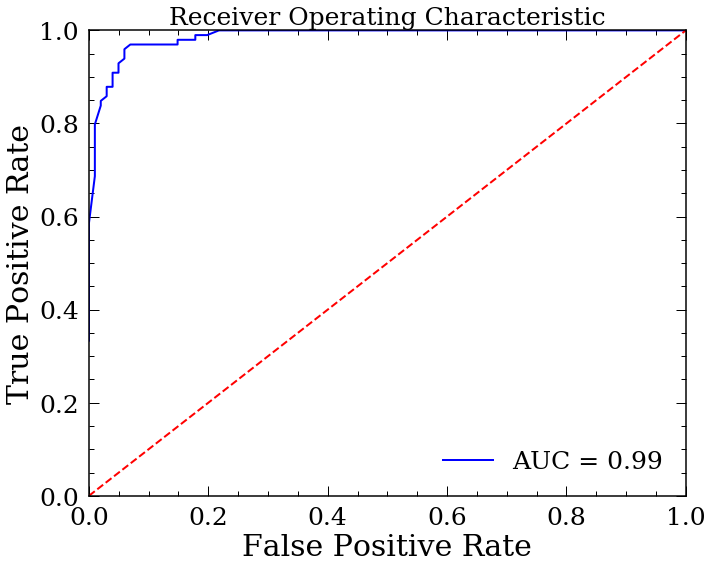

In [10]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
    
# predict the probability for testing set using the trained model
probs = regr.predict_proba(regr_outs.X_test)
preds = probs[:,1]

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(regr_outs.y_test, preds)

# get the accuracy
roc_auc = metrics.auc(fpr, tpr)

# plot the ROC curve
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic',fontsize=25)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.savefig('ROC.png')